In [7]:
#Library importing
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from  tensorflow.keras import datasets,layers,models
import cv2 as cv
import sklearn
import os
import scipy
# from sklearn.model_selection import train_test_split

In [8]:
#Menyiapkan datasets

train_icecream_dir = os.path.join('train/Ice Cream')
train_meat_dir = os.path.join('train/Meat')
train_egg_dir = os.path.join('train/Egg')
# train_chocolate_dir = os.path.join('train/Chocolate')
valid_icecream_dir = os.path.join('valid/Ice Cream')
valid_meat_dir = os.path.join('valid/meat')
valid_egg_dir = os.path.join('valid/egg')
# valid_chocolate_dir = os.path.join('valid/chocolate')

In [9]:
# Mengecek banyaknya data

print('total training ice cream images:', len(os.listdir(train_icecream_dir)))
print('total training meat images:', len(os.listdir(train_meat_dir)))
print('total training egg images:', len(os.listdir(train_egg_dir)))
# print('total training chocolate images:', len(os.listdir(train_chocolate_dir)))
print('total validation ice cream images:', len(os.listdir(valid_icecream_dir)))
print('total validation meat images:', len(os.listdir(valid_meat_dir)))
print('total validation egg images:', len(os.listdir(valid_egg_dir)))
# print('total validation chocolate images:', len(os.listdir(valid_chocolate_dir)))

total training ice cream images: 127
total training meat images: 210
total training egg images: 215
total validation ice cream images: 11
total validation meat images: 21
total validation egg images: 18


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
nrows = 4
ncols = 4
pic_index = 0

In [12]:
train_icecream_names =os.listdir(train_icecream_dir)
train_meat_names = os.listdir(train_meat_dir)
train_egg_names = os.listdir(train_egg_dir)
# train_chocolate_names = os.listdir(train_chocolate_dir)


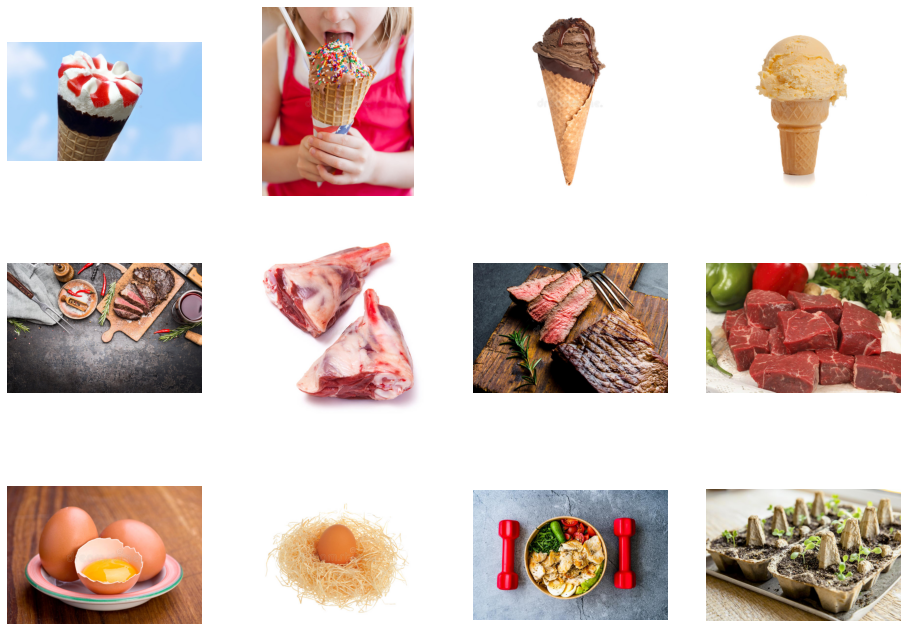

In [13]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_icecream_pic = [os.path.join(train_icecream_dir, fname) 
                for fname in train_icecream_names[pic_index-4:pic_index]]
next_meat_pic = [os.path.join(train_meat_dir, fname) 
                for fname in train_meat_names[pic_index-4:pic_index]]
next_egg_pic = [os.path.join(train_egg_dir, fname) 
                for fname in train_egg_names[pic_index-4:pic_index]]
# next_chocolate_pic = [os.path.join(train_chocolate_dir, fname) 
#                 for fname in train_chocolate_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_icecream_pic + next_meat_pic + next_egg_pic) :
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)
  
  # for i, img_path in enumerate(next_icecream_pic + next_meat_pic + next_egg_pic + next_chocolate_pic):
  
  # sp = plt.subplot(nrows, ncols, i + 1)
  # sp.axis('Off') 

  # img = mpimg.imread(img_path)
  # plt.imshow(img)

plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'train/',  # This is the source directory for training images
        classes = ['Ice Cream', 'Meat','Egg'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'valid/',  # This is the source directory for training images
        classes = ['Ice Cream', 'Meat','Egg'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 548 images belonging to 3 classes.
Found 47 images belonging to 3 classes.


In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator


In [16]:
model = Sequential()

# Conv Layer pertama
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape=(200,200, 3)))
model.add(MaxPooling2D(2,2))

# Conv Layer kedua
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer ketiga
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer keempat
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# # Conv Layer kelima
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Flatten
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-04 19:58:40.239313: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-04 19:58:40.239635: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [18]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(train_generator,
    #   steps_per_epoch=9,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=10)

2022-04-04 19:58:41.351831: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-04-04 19:58:41.598885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: -0.7568 - accuracy: 0.3558

2022-04-04 19:58:47.293792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 7s 1s/step - loss: -0.7568 - accuracy: 0.3558 - val_loss: -3.2614 - val_accuracy: 0.4255
Epoch 2/10
5/5 [==============================] - 5s 965ms/step - loss: -14.3183 - accuracy: 0.3814
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: -104.3054 - accuracy: 0.3814
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: -721.6100 - accuracy: 0.3814
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: -3676.6755 - accuracy: 0.3814
Epoch 6/10
5/5 [==============================] - 10s 2s/step - loss: -14949.7432 - accuracy: 0.3814
Epoch 7/10
5/5 [==============================] - 21s 4s/step - loss: -40431.8086 - accuracy: 0.3814
Epoch 8/10
5/5 [==============================] - 17s 2s/step - loss: -140349.9531 - accuracy: 0.3814
Epoch 9/10
5/5 [==============================] - 14s 2s/step - loss: -448166.1250 - accuracy: 0.3814
Epoch 10/10
5/5 [==============================] - 11s 2s/step - loss: 